# Logistic Regression

In [1]:
%run -m ipy_startup
%matplotlib inline
from py_utils import math

In [18]:
# Generate random data to model
np.random.seed(1)
n, n_var = 100000, 25
#n, n_class, n_var = 10000, 4, 5

X = np.random.randn(n, n_var)

b_act = np.random.randn(n_var)
b_int = -1.5
p = math.sigmoid(b_int + np.dot(X, b_act))

y = np.array([np.random.choice(np.array([0, 1]), size=1, p=[1-v, v])[0] for v in p])

X.shape, y.shape

((100000, 25), (100000,))

In [19]:
pd.Series(y).value_counts()

0    64688
1    35312
dtype: int64

In [20]:
from ml.scipy import optimize, models
param_names = ['X{}'.format(i) for i in range(n_var)]
constraints = optimize.ScipyConstraints()
#constraints.add_gtez('X0')
# constraints.add_gte('X1', 'X8')
# constraints.add_gte('X2', 'X9')
# constraints.add_gte('X3', 'X10')
# constraints.add_gte('X4', 'X11')
# constraints.add_gte('X5', 'X12')
# constraints.add_gte('X6', 'X13')
#constraints.add_gtev('X1', 5.0)

model = (
    models.ScipyLogisticRegressionModelBuilder()
    .add_linear_params(param_names)
    .add_intercept()
    .build()
)


In [21]:
%%time
est = optimize.ScipyRegressor(model, analytical_gradients=True, monitor_gradient=True)
est.fit(X, y)

CPU times: user 3.99 s, sys: 50.3 ms, total: 4.04 s
Wall time: 1.03 s


In [22]:
print(est.get_fit_summary())

Optimization converged successfully:

    Success: True
    Status Code: 0
    Message: Optimization terminated successfully.
    Number of iterations: 12
    Number of function evaluations: 13
    Objective Function Value: 0.2961519778451411
    


In [23]:
est.get_gradient_error_history()

array([  2.37471445e-08,   1.60932554e-08,   1.53922473e-08,
         1.09171950e-08,   3.11467994e-08,   1.21765947e-08,
         1.45349393e-08,   1.23837600e-08,   1.61291802e-08,
         2.54392475e-08,   1.96485653e-08,   2.13310067e-08])

In [24]:
est.fit_

     fun: 0.2961519778451411
     jac: array([ -3.23943272e-05,  -1.98823499e-05,  -3.60572254e-05,
         2.77765728e-05,  -2.26867948e-05,   2.05430901e-05,
        -2.38734395e-05,   8.37480555e-05,   2.59035038e-05,
         2.11523987e-05,   3.47835488e-06,   3.67495761e-05,
        -8.73140369e-05,   1.02793600e-05,  -5.84601774e-05,
        -4.77776565e-05,   3.59872703e-05,   1.46178969e-05,
         7.00250836e-07,  -2.57525842e-05,  -2.49943925e-05,
        -6.00261363e-05,   3.39212025e-05,   1.08715319e-05,
        -3.32607494e-05,   1.38294761e-05])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([-1.50697783,  0.5030532 , -0.77216461, -0.0170197 , -0.49477452,
        0.57759569, -0.37420178,  1.61479035,  0.96798676,  0.42357443,
       -0.51620624, -0.1936134 , -0.94429151, -0.12387243, -0.60887483,
       -0.24584615,  0.3305212 , -0.04756696,  0.40700388, -0.05871122,
       -0.80953

In [25]:
d_inf = est.inference()
d_inf

{'linear': OrderedDict([('X0', 0.50305320371473961), ('X1', -0.77216461442676576), ('X2', -0.017019695808120613), ('X3', -0.49477452170510838), ('X4', 0.57759569283814693), ('X5', -0.37420178426720468), ('X6', 1.6147903490269511), ('X7', 0.96798675821643188), ('X8', 0.42357443385798899), ('X9', -0.5162062428072407), ('X10', -0.19361340056699089), ('X11', -0.94429151076055906), ('X12', -0.12387242870346886), ('X13', -0.60887482639798041), ('X14', -0.24584614535521751), ('X15', 0.33052119542999936), ('X16', -0.047566964097619104), ('X17', 0.40700387636245561), ('X18', -0.058711224322447249), ('X19', -0.80953402119845841), ('X20', -1.8786446081525778), ('X21', 0.6412012390319658), ('X22', -0.20066756653292267), ('X23', -0.82537646332129699), ('X24', -0.60351881448206446)]), 'fit': OrderedDict(), 'intercept': OrderedDict([('intercept', -1.5069778297712662)])}

In [26]:
b_int

-1.5

In [27]:
b_act

array([ 0.47834502, -0.7695831 , -0.03104586, -0.47849118,  0.56173319,
       -0.37009213,  1.59485012,  0.9710682 ,  0.43058281, -0.50694111,
       -0.18585817, -0.94271725, -0.12937793, -0.61099284, -0.24448332,
        0.33918714, -0.03179941,  0.40415388, -0.06600022, -0.81839942,
       -1.86816648,  0.63376793, -0.20945399, -0.81956493, -0.60325046])

In [28]:
def compare(v_est, v_act):
    plt.scatter(v_est, v_act)
    vmin, vmax = v_act.min(), v_act.max()
    plt.xlim(vmin - .1, vmax + .1)
    plt.ylim(vmin - .1, vmax + .1)

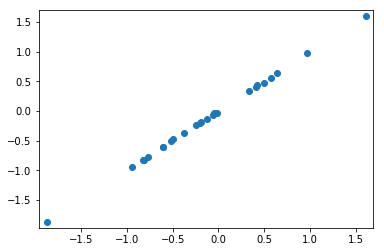

In [29]:
compare(pd.Series(d_inf['linear']), b_act)

In [30]:
d_proba = est.predict(X, key='probabilities')
d_proba[:5]

array([[ 0.00210619,  0.99789381],
       [ 0.92851674,  0.07148326],
       [ 0.06693114,  0.93306886],
       [ 0.89165233,  0.10834767],
       [ 0.99733573,  0.00266427]])

In [31]:
pd.Series(np.argmax(d_proba, axis=1) + 1).value_counts()

1    66175
2    33825
dtype: int64

In [32]:
pd.DataFrame({
    'predicted': est.predict(X),
    'actual': y
}).groupby(['predicted', 'actual']).size().unstack().style.background_gradient()

actual,0,1
predicted,,
0,58872,7303
1,5816,28009


In [33]:
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
pd.DataFrame({
    'predicted': GradientBoostingClassifier().fit(X, y).predict(X),
    'actual': y
}).groupby(['predicted', 'actual']).size().unstack().style.background_gradient()

actual,0,1
predicted,,
0,60055,11075
1,4633,24237
